In [1]:
# Testing different CHIANTI database files with the sunxspex thermal model
# 
# 
# 
# 5-Jun-2023 IGH

In [2]:
import numpy as np
from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt

from sunxspex import thermal

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
            'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [3]:
# generate some energy edges
engs=np.arange(1.01,21,0.01)

In [4]:
# Generate some thermal models for 1e49 and 10, 20MK
# Uses older/default v7.1 CHIANTI save files from sswidl
f10=thermal.thermal_emission(engs << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20=thermal.thermal_emission(engs << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

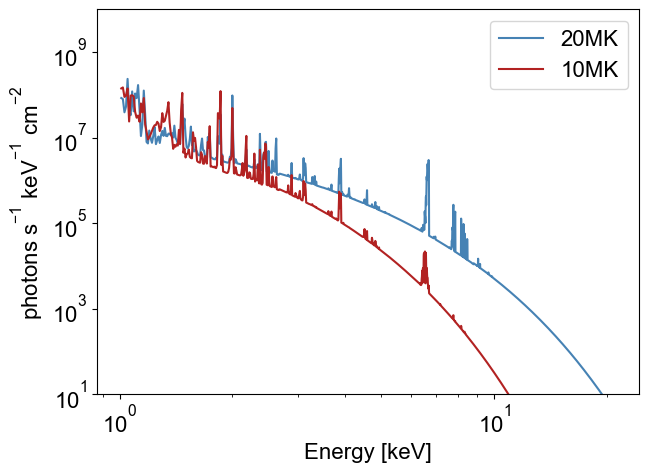

In [5]:
matplotlib.rcParams['font.size']=16
fig, ax= plt.subplots(1,figsize=(7,5))
ax.plot(engs[:-1],f20.value,label='20MK',color='steelblue')
ax.plot(engs[:-1],f10.value,label='10MK',color='firebrick')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e1,1e10])
ax.set_ylabel('$photons\;s^{-1}\;keV^{-1}\;cm^{-2}$')
ax.set_xlabel('Energy [keV]')
plt.legend()
plt.show()

In [6]:
# Load in the new continuum file
new_cont=thermal.setup_continuum_parameters('../idl/chianti_cont_1_250_unity_v1002_t41.sav')
#  Load in the new lines files
# new_line=thermal.setup_line_parameters('../idl/chianti_lines_1_12_unity_v1002_t41.sav')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 1: invalid continuation byte

In [9]:
# Maybe just try one of the other idl files...
chdir='/usr/local/ssw/packages/xray/dbase/chianti/'
# No v9.0.1 sav file version for cont in sswidl so just stick with default one
# Should really change much from ver to ver anyway
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters(chdir+'chianti_cont_1_250_v71.sav')
thermal.LINE_GRID=thermal.setup_line_parameters(chdir+'chianti_lines_01_12_unity_v901_t41.sav')
f10_v9=thermal.thermal_emission(engs << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))

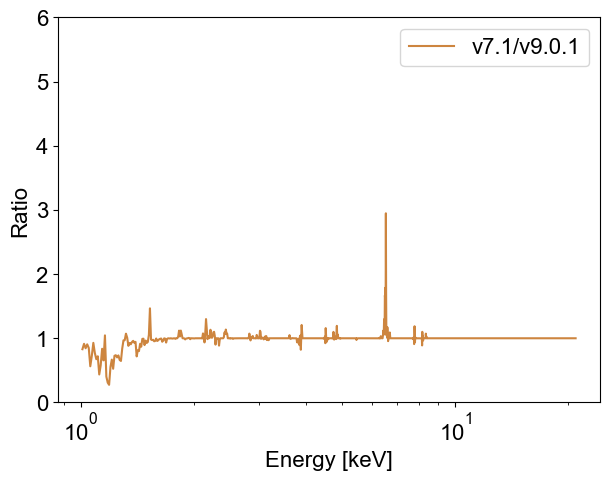

In [10]:
matplotlib.rcParams['font.size']=16
fig, ax= plt.subplots(1,figsize=(7,5))
ax.plot(engs[:-1],f10.value/f10_v9.value,label='v7.1/v9.0.1',color='peru')
ax.set_xscale('log')
ax.set_ylim([0,6])
ax.set_ylabel('Ratio')
ax.set_xlabel('Energy [keV]')
plt.legend()
plt.show()